# Part I Value at Risk (VaR) for Algorithmic Trading Risk Management - Part I

 <p>Estimating the risk of loss to an algorithmic trading strategy, or portfolio of strategies, is of extreme importance for long-term capital growth. Many techniques for risk management have been developed for use in institutional settings. One technique in particular, known as <strong>Value at Risk</strong> or <strong>VaR</strong>, will be the topic of this article.</p>

<p>We will be applying the concept of VaR to a single strategy or a set of strategies in order to help us quantify risk in our trading portfolio. The definition of VaR is as follows:</p>

<p><strong>VaR provides an <em>estimate</em>, under a given degree of confidence, of the size of a loss from a portfolio over a given time period.</strong></p>

<p>In this instance "portfolio" can refer to a single strategy, a group of strategies, a trader's book, a prop desk, a hedge fund or an entire investment bank. The "given degree of confidence" will be a value of, say, 95% or 99%. The "given time period" will be chosen to reflect one that would lead to a minimal <em>market impact</em> if a portfolio were to be liquidated.</p>

<p>For example, a VaR equal to 500,000 USD at 95% confidence level for a time period of a day would simply state that there is a 95% probability of losing no more than 500,000 USD in the following day. Mathematically this is stated as:</p>

\begin{eqnarray}
P(L \leq -5.0 \times 10^5) = 0.05
\end{eqnarray}

<p>Or, more generally, for loss $L$ exceeding a value $VaR$ with a confidence level $c$ we have:</p>

\begin{eqnarray}
P(L \leq -VaR) = 1-c
\end{eqnarray}

<p>The "standard" calculation of VaR makes the following assumptions:</p>

<ul>
  <li><strong>Standard Market Conditions</strong> - VaR is not supposed to consider extreme events or "tail risk", rather it is supposed to provide the expectation of a loss under normal "day-to-day" operation.</li>
  <li><strong>Volatilities and Correlations</strong> - VaR requires the volatilities of the assets under consideration, as well as their respective correlations. These two quantities are tricky to estimate and are subject to continual change.</li>
  <li><strong>Normality of Returns</strong> - VaR, in its standard form, assumes the returns of the asset or portfolio are <em>normally distributed</em>. This leads to more straightforward analytical calculation, but it is quite unrealistic for most assets.</li>
</ul>

<h2>Advantages and Disadvantages</h2>

<p>VaR is pervasive in the financial industry, hence you should be familiar with the benefits and drawbacks of the technique. Some of the advantages of VaR are as follows:</p>

<ul>
  <li>VaR is very straightforward to calculate for individual assets, algo strategies, quant portfolios, hedge funds or even bank prop desks.</li>
  <li>The time period associated with the VaR can be modified for multiple trading strategies that have different time horizons.</li>
  <li>Different values of VaR can be associated with different forms of risk, say broken down by asset class or instrument type. This makes it easy to interpret where the majority of portfolio risk may be clustered, for instance.</li>
  <li>Individual strategies can be constrained as can entire portfolios based on their individual VaR.</li>
  <li>VaR is straightforward to interpret by (potentially) non-technical external investors and fund managers.</li>
</ul>

<p>However, VaR is not without its disadvantages:</p>

<ul>
  <li>VaR does not discuss the magnitude of the expected loss beyond the value of VaR, i.e. it will tell us that we are likely to see a loss <em>exceeding</em> a value, but not how much it exceeds it.</li>
  <li>It does not take into account extreme events, but only typical market conditions.</li>
  <li>Since it uses historical data (it is rearward-looking) it will not take into account future market regime shifts that can change volatilities and correlations of assets.</li>
</ul>

<p>VaR should not be used in isolation. It should always be used with a suite of risk management techniques, such as diversification, optimal portfolio allocation and prudent use of leverage.</p>

<h2>Methods of Calculation</h2>

<p>As of yet we have not discussed the actual calculation of VaR, either in the general case or a concrete trading example. There are three techniques that will be of interest to us. The first is the variance-covariance method (using normality assumptions), the second is a Monte Carlo method (based on an underlying, potentially non-normal, distribution) and the third is known as historical bootstrapping, which makes use of historical returns information for assets under consideration.</p>

<p>In this article we will concentrate on the Variance-Covariance Method and in later articles will consider the Monte Carlo and Historical Bootstrap methods.</p>

<h3>Variance-Covariance Method</h3>

<p>Consider a portfolio of $P$ dollars, with a confidence level $c$. We are considering daily returns, with asset (or strategy) historical standard deviation $\sigma$ and mean $\mu$. Then the <em>daily</em> VaR, under the variance-covariance method for a single asset (or strategy) is calculated as:</p>

\begin{eqnarray}
P - \left( P (\alpha(1-c) + 1) \right)
\end{eqnarray}

<p>Where $\alpha$ is the inverse of the cumulative distribution function of a normal distribution with mean $\mu$ and standard deviation $\sigma$.</p>

<p>We can use the SciPy and pandas libraries from Python in order to calculate these values. If we set $P=10^6$ and $c=0.99$, we can use the <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html">SciPy ppf method</a> to generate the values for the inverse cumulative distribution function to a normal distribution with $\mu$ and $\sigma$ obtained from some real financial data, in this case the historical daily returns of CitiGroup (we could easily substitute the returns of an algorithmic strategy in here):</p>


In [36]:
import datetime
import numpy as np
import pandas_datareader as web
from scipy.stats import norm
import matplotlib
%matplotlib inline 

In [4]:
def var_cov_var(P, c, mu, sigma):
    """
    Variance-Covariance calculation of daily Value-at-Risk using 
        c as confidence level 
        mu as mean of returns 
        sigma as standard deviation, 
        on a portfolio of value P.
    """
    alpha = norm.ppf(1-c, mu, sigma)
    return P - P*(alpha + 1)

In [48]:
if __name__ == "__main__":
    start = datetime.datetime(2001, 1, 1)
    end = datetime.datetime(2018, 10, 1)

    Stock = web.DataReader("AAPL", 'yahoo', start, end)
    Stock["rets"] = Stock["Adj Close"].pct_change()

    P = 15000000   
    c = 0.99  # 99% confidence interval
    mu = np.mean(Stock["rets"])
    sigma = np.std(Stock["rets"])

    var = var_cov_var(P, c, mu, sigma)
    print("Portfolio: %0.2f" % P)
    print("confidence interval: %0.12f" % c)
    print("mu: %0.12f" % mu)
    print("alpha: %0.12f" % norm.ppf(1-c, mu, sigma))
    print("sigma: %0.12f" % sigma)
    print("Value-at-Risk: %0.1f" % var)
    

Portfolio: 15000000.00
confidence interval: 0.990000000000
mu: 0.001558128734
alpha: -0.052162671534
sigma: 0.023092333210
Value-at-Risk: 782440.1


\begin{eqnarray}
1000000 - \left( 1000000 (\ -0.045836171658(1-0.99) + 1) \right)
\end{eqnarray}

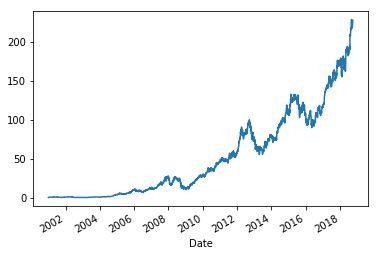

In [45]:
Stock["Close"].plot()

In [46]:
citi


,High,Low,Open,Close,Volume,Adj Close,rets
Date,,,,,,,
2001-01-02,1.089286,1.040179,1.062500,1.062500,113078000.0,0.713999,NaN
2001-01-03,1.191964,1.031250,1.035714,1.169643,204268400.0,0.785999,0.100840
2001-01-04,1.321429,1.200893,1.295757,1.218750,184849000.0,0.818999,0.041985
2001-01-05,1.241071,1.147321,1.209821,1.169643,103089000.0,0.785999,-0.040293
2001-01-08,1.213164,1.138393,1.209821,1.183036,93424800.0,0.794999,0.011451
2001-01-09,1.260043,1.183036,1.200893,1.227679,147232400.0,0.824999,0.037736
2001-01-10,1.214286,1.147321,1.191964,1.183036,145195400.0,0.794999,-0.036363
2001-01-11,1.321429,1.160714,1.160714,1.285714,200933600.0,0.863999,0.086792
2001-01-12,1.285714,1.218750,1.276786,1.227679,105844200.0,0.824999,-0.045139
